# **APP INSIGHTS ANALYSIS**



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/dataset/googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# AVERAGE RATINGS OF APPS

In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/dataset/googleplaystore.csv")
mean_rating = df['Rating'].mean() # Assign the mean of the 'Rating' column to the variable 'mean_rating'
print(mean_rating) # Print the value of 'mean_rating' to verify the assignment

4.193338315362443


# UNIQUE CATEGORIES OF APPS

In [ ]:
unique_categories=df['Category'].unique()
print(unique_categories)

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']


# DISTRIBUTION OF APP SIZES

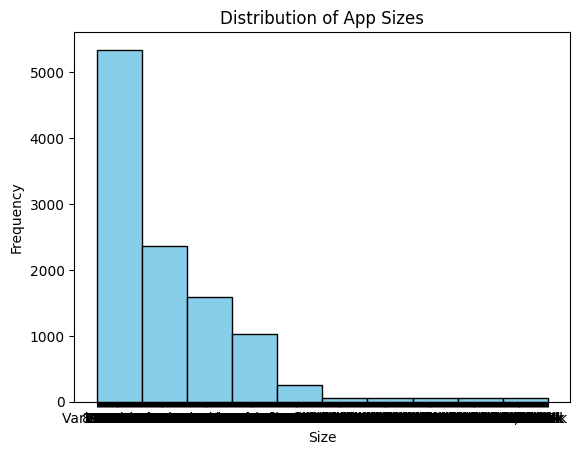

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['Size'],bins=10,color='skyblue',edgecolor='black')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.title('Distribution of App Sizes')
plt.show()

# FREE VS PAID APPS

In [ ]:
type_counts=df['Type'].value_counts()
print('Occurence of each type:')
print(type_counts)

Occurence of each type:
Type
Free    10039
Paid      800
0           1
Name: count, dtype: int64


# COMMON CONTENT RATING FOR APPS

In [ ]:
content_rating_mode=df['Content Rating'].mode()
print('Mode of comment rating:')
print(content_rating_mode)

Mode of comment rating:
0    Everyone
Name: Content Rating, dtype: object


# TOP 5 INSTALLED APPS

In [ ]:
df.sorted=df.sort_values(by='Installs',ascending=False)
top_5_installs=df.sorted.head(5)
print(top_5_installs)

                                               App            Category  \
10472      Life Made WI-Fi Touchscreen Photo Frame                 1.9   
420    UC Browser - Fast Download Private & Secure       COMMUNICATION   
474                    LINE: Free Calls & Messages       COMMUNICATION   
3767                  Flipboard: News For Our Time  NEWS_AND_MAGAZINES   
3574                                   Cloud Print        PRODUCTIVITY   

       Rating   Reviews                Size      Installs  Type     Price  \
10472    19.0      3.0M              1,000+          Free     0  Everyone   
420       4.5  17714850                 40M  500,000,000+  Free         0   
474       4.2  10790289  Varies with device  500,000,000+  Free         0   
3767      4.4   1284017  Varies with device  500,000,000+  Free         0   
3574      4.1    282460  Varies with device  500,000,000+  Free         0   

      Content Rating             Genres    Last Updated         Current Ver  \
10472        

<ipython-input-15-e0b513105813>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.sorted=df.sort_values(by='Installs',ascending=False)


# APPS WITH RATING 4.0 AND ABOVE

In [ ]:
filtered_ratings=df[df['Rating']>4.0]
print("Apps with a rating of 4.0m  or above")
print(filtered_ratings)

Apps with a rating of 4.0m  or above
                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
5                             Paper flowers instructions       ART_AND_DESIGN   
...                                                  ...                  ...   
10833                                        Chemin (fr)  BOOKS_AND_REFERENCE   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFE

# AVERAGE NUMBER OF REVIEWS FOR FREE VS PAID APPS

In [ ]:
df['Reviews'] = pd.to_numeric(df['Reviews'].str.replace('M', '', regex=False), errors='coerce')
mean_reviews_by_type=df.groupby('Type')['Reviews'].mean()
print('Mean review grouped by type')
print(mean_reviews_by_type)

Mean review grouped by type
Type
0            3.000000
Free    478661.096026
Paid     11673.312500
Name: Reviews, dtype: float64


# APP SIZE FOR EACH CATEGORY

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/dataset/googleplaystore.csv")

df['Size'] = (
    df['Size']
    .replace('Varies with device', None)  # Replace 'Varies with device' with NaN
    .str.replace('M', '', regex=False)  # Remove 'M' for megabytes
    .str.replace('k', '', regex=False)  # Remove 'k' for kilobytes (if any)
    .str.replace(',', '', regex=False)  # Remove commas
    .str.replace('+', '', regex=False)  # Remove '+' from '1000+' to allow conversion to float
    .astype(float, errors='ignore') # Convert to float, ignoring errors if any
)


# If you want to fill the non-numeric values with something else, use:
df['Size'] = pd.to_numeric(df['Size'], errors='coerce').fillna(0)  # Replace non-numeric with 0, or any other desired value

mean_size_by_category = df.groupby('Category')['Size'].mean()  # Corrected groupby syntax
print("Mean size grouped by category")
print(mean_size_by_category)


Mean size grouped by category
Category
1.9                    1000.000000
ART_AND_DESIGN           11.800000
AUTO_AND_VEHICLES        30.443529
BEAUTY                   12.233962
BOOKS_AND_REFERENCE      34.410823
BUSINESS                 23.150000
COMICS                   28.995000
COMMUNICATION            38.200258
DATING                   15.139316
EDUCATION                21.722436
ENTERTAINMENT            13.200000
EVENTS                   17.650000
FAMILY                   35.309381
FINANCE                  24.236885
FOOD_AND_DRINK           17.468504
GAME                     40.633042
HEALTH_AND_FITNESS       29.557185
HOUSE_AND_HOME           19.794318
LIBRARIES_AND_DEMO      174.451765
LIFESTYLE                28.237173
MAPS_AND_NAVIGATION      24.684672
MEDICAL                  41.708855
NEWS_AND_MAGAZINES       11.027562
PARENTING                20.261667
PERSONALIZATION          38.629337
PHOTOGRAPHY              16.111642
PRODUCTIVITY             25.461085
SHOPPING        

# APPS LAST UPDATED IN 2018


In [ ]:
print(df.columns)

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [ ]:
df['Last updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

df_2018 = df[df['Last updated'].dt.year == 2018]
print('Apps Last updated in 2018')
print(df_2018)

Apps Last updated in 2018
                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10826          Frim: get new friends on local chat rooms               SOCIAL   
10827                                 Fr Agnel Ambarnath               FAMILY   
10831                           payermonstationnement.fr  MAPS_AND_NAVIGATION   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

 

# CORRELATION BETWEEN THE NUMBER OF INSTALLS AND THE APP RATING

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv("/content/drive/MyDrive/dataset/googleplaystore.csv")

# Replace non-numeric values (like 'Free') with 0 before converting to float
df['Installs'] = pd.to_numeric(df['Installs'].str.replace('[+,]', '', regex=True), errors='coerce').fillna(0)

# Now you can safely convert to float
df['Installs'] = df['Installs'].astype(float)

df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

df=df.dropna(subset=['Installs','Rating'])
correlation  =df['Installs'].corr(df['Rating'])
print(f"Correlation using pandas: {correlation}") # Fixed variable name here
correlation_numpy = np.corrcoef(df['Installs'], df['Rating'])[0, 1]
print(f"Correlation using numpy: {correlation_numpy}")

Correlation using pandas: 0.04865225922721491
Correlation using numpy: 0.04865225922721491


# APP CATEGORIES WITH HIGHEST AVERAGE RATING

In [ ]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
mean_rating_by_category=df.groupby('Category')['Rating'].mean()
print('Mean rating grouped by category')
print(mean_rating_by_category)

Mean rating grouped by category
Category
1.9                    19.000000
ART_AND_DESIGN          4.358065
AUTO_AND_VEHICLES       4.190411
BEAUTY                  4.278571
BOOKS_AND_REFERENCE     4.346067
BUSINESS                4.121452
COMICS                  4.155172
COMMUNICATION           4.158537
DATING                  3.970769
EDUCATION               4.389032
ENTERTAINMENT           4.126174
EVENTS                  4.435556
FAMILY                  4.192272
FINANCE                 4.131889
FOOD_AND_DRINK          4.166972
GAME                    4.286326
HEALTH_AND_FITNESS      4.277104
HOUSE_AND_HOME          4.197368
LIBRARIES_AND_DEMO      4.178462
LIFESTYLE               4.094904
MAPS_AND_NAVIGATION     4.051613
MEDICAL                 4.189143
NEWS_AND_MAGAZINES      4.132189
PARENTING               4.300000
PERSONALIZATION         4.335987
PHOTOGRAPHY             4.192114
PRODUCTIVITY            4.211396
SHOPPING                4.259664
SOCIAL                  4.255598
SP

# HOW DOES PRICE OF AN APP AFFECT THE RATING

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv("/content/drive/MyDrive/dataset/googleplaystore.csv")

# Convert 'Price' column to string
df['Price'] = df['Price'].astype(str)

# Now you can safely use .str.replace
df['Price'] = df['Price'].str.replace('$', '', regex=False).str.replace('Everyone', '0', regex=False)  # Replace $ and 'Everyone' with 0

# Convert 'Price' to numeric after cleaning
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')  # Convert to numeric, handling errors

df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Ensure 'Price' is numeric and compare with 0.0 (float)
paid_apps = df[df['Price'] > 0.0]
mean_rating_by_price = paid_apps.groupby('Price')['Rating'].mean()
print('Mean rating grouped by price')
print(mean_rating_by_price)

Mean rating grouped by price
Price
0.99      4.298131
1.00      4.450000
1.04           NaN
1.20      4.200000
1.26           NaN
            ...   
379.99    2.900000
389.99    3.600000
394.99         NaN
399.99    4.009091
400.00    3.600000
Name: Rating, Length: 91, dtype: float64


# DISTRIBUTION OF APP RATINGS ACROSS DIFFERENT CONTENT RATINGS

<ipython-input-14-e833c2591707>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Content Rating'] = data['Content Rating'].astype('category')


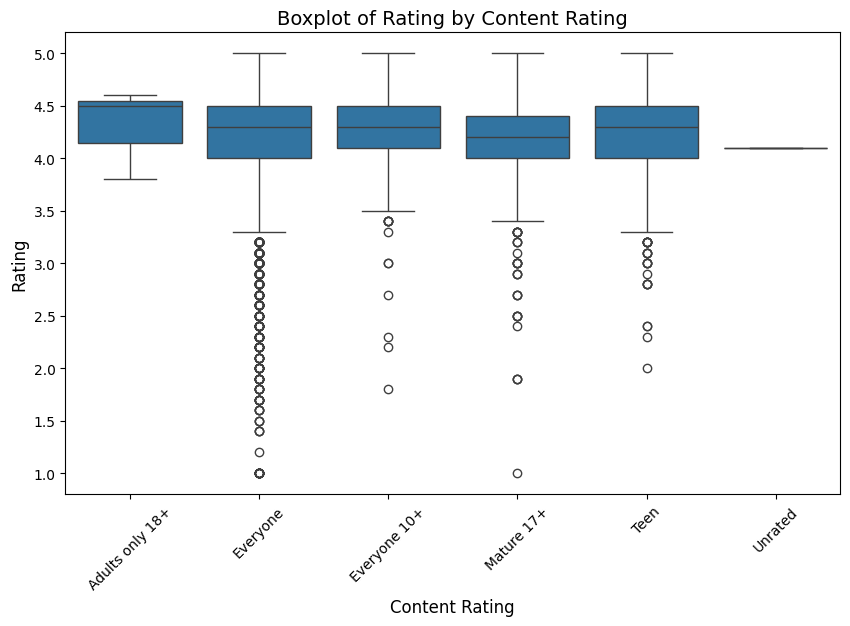

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("/content/drive/MyDrive/dataset/googleplaystore.csv")
# Drop rows with missing values in Rating or Content Rating
data = df.dropna(subset=['Rating', 'Content Rating']) # Change data to df


data['Content Rating'] = data['Content Rating'].astype('category')

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Content Rating', y='Rating', data=data)
plt.title('Boxplot of Rating by Content Rating', fontsize=14)
plt.xlabel('Content Rating', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# GENRES HAVING MOST APPS WITH OVER 1 MILLION INSTALLS

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/dataset/googleplaystore.csv")

# Drop rows with missing values in Rating or Content Rating
data = df.dropna(subset=['Rating', 'Content Rating'])

# Ensure 'Installs' is treated as a string before using .str
data['Installs'] = data['Installs'].astype(str)

# Now you can use .str.replace to clean the column
data['Installs'] = data['Installs'].str.replace(',', '', regex=False).str.replace('+', '', regex=False).astype(int)
filtered_data = data[data['Installs'] > 1000000]

# Specify numeric_only=True to calculate mean only for numeric columns
grouped_data = filtered_data.groupby('Genres').mean(numeric_only=True)
print(grouped_data)

                                         Rating      Installs
Genres                                                       
Action                                 4.376842  4.878947e+07
Action;Action & Adventure              4.272727  7.727273e+06
Adventure                              4.238889  2.166667e+07
Adventure;Action & Adventure           4.470000  9.050000e+07
Adventure;Education                    4.100000  1.000000e+07
...                                         ...           ...
Video Players & Editors                4.298333  1.028333e+08
Video Players & Editors;Creativity     4.100000  5.000000e+06
Video Players & Editors;Music & Video  4.000000  8.333333e+06
Weather                                4.275000  1.666667e+07
Word                                   4.500000  1.558824e+07

[88 rows x 2 columns]


<ipython-input-18-7f879e956a2d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Installs'] = data['Installs'].astype(str)
<ipython-input-18-7f879e956a2d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Installs'] = data['Installs'].str.replace(',', '', regex=False).str.replace('+', '', regex=False).astype(int)


# AVERAGE TIME BETWEEN APPS

In [ ]:
import pandas as pd

# Convert 'Last Updated' to datetime
data['Last Updated'] = pd.to_datetime(data['Last Updated'])

# Sort the data by App and Last Updated
data_sorted = data.sort_values(by=['App', 'Last Updated'])

# Calculate the difference between consecutive updates for each app
data_sorted['Update Difference'] = data_sorted.groupby('App')['Last Updated'].diff()

# Display the result
print(data_sorted[['App', 'Last Updated', 'Update Difference']])

                                                   App Last Updated  \
8532                     +Download 4 Instagram Twitter   2018-08-02   
324                         - Free Comics - Comic Apps   2018-07-13   
4541                                                .R   2014-09-16   
4636                                            /u/app   2018-07-03   
5940                                            058.ba   2018-07-06   
...                                                ...          ...   
6420                                       감성학원 BL 첫사랑   2017-11-17   
4362                                        💎 I'm rich   2018-03-11   
2575     💘 WhatsLov: Smileys of love, stickers and GIF   2018-07-24   
7559  📏 Smart Ruler ↔️ cm/inch measuring for homework!   2017-10-21   
882   🔥 Football Wallpapers 4K | Full HD Backgrounds 😍   2018-07-14   

     Update Difference  
8532               NaT  
324                NaT  
4541               NaT  
4636               NaT  
5940               NaT

<ipython-input-19-9af07bebb641>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Last Updated'] = pd.to_datetime(data['Last Updated'])


# IMPACT OF APP SIZE ON NUMBER OF INSTALLS

<ipython-input-21-9bd6b5cb524d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Size'] = data['Size'].replace('Varies with device', None)
<ipython-input-21-9bd6b5cb524d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Size'] = data['Size'].str.replace('M', '').str.replace('k', 'e-3').astype(float)


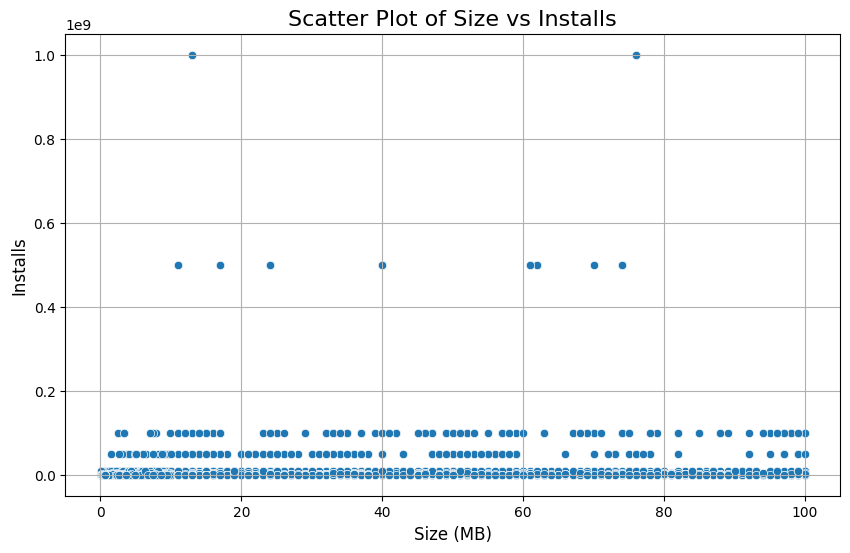

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 'Installs' is already an int, so no need to convert again
# If you need to clean the data again, you need to load a fresh copy of the DataFrame

# Convert 'Size' to numeric (handle 'Varies with device' if present)
data['Size'] = data['Size'].replace('Varies with device', None)
data['Size'] = data['Size'].str.replace('M', '').str.replace('k', 'e-3').astype(float)

# Scatter plot with Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Size', y='Installs')
plt.title('Scatter Plot of Size vs Installs', fontsize=16)
plt.xlabel('Size (MB)', fontsize=12)
plt.ylabel('Installs', fontsize=12)
plt.grid(True)
plt.show()

# APPS HAVING HIGHEST NUMBER OF REVIEWS AND THEIR RATING

In [1]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/dataset/googleplaystore.csv")
data = df.dropna(subset=['Rating', 'Content Rating'])
data_sorted = data.sort_values(by='Reviews', ascending=False) # Changed data.sorted_values to data.sort_values
top_apps = data_sorted.head(5)
print(top_apps[['App', 'Reviews', 'Rating']]) # Change 'Apps' to 'App' to match the column name

                                    App Reviews  Rating
2989             GollerCepte Live Score    9992     4.2
4970       Ad Block REMOVER - NEED ROOT     999     3.3
2723                SnipSnap Coupon App    9975     4.2
2705                SnipSnap Coupon App    9975     4.2
3079  US Open Tennis Championships 2018    9971     4.0


# CONTENT RATING DISTRUBUTION DIFFER BETWEEN FREE AND PAID APPS

In [2]:
import pandas as pd

# Create a crosstab
crosstab = pd.crosstab(data['Content Rating'], data['Type'])

# Display the crosstab
print(crosstab)


Type             Free  Paid
Content Rating             
Adults only 18+     3     0
Everyone         6868   552
Everyone 10+      364    33
Mature 17+        444    17
Teen             1039    45
Unrated             1     0


# TOP FIVE CATEGORIES WITH THE MOST INSTALLS

In [3]:
import pandas as pd

# Group the data by Category and sum the Installs column
installs_by_category = data.groupby('Category')['Installs'].sum()

# Sort the results in descending order
sorted_installs = installs_by_category.sort_values(ascending=False)

# Select the top 5 categories
top_5_categories = sorted_installs.head(5)

# Display the results
print(top_5_categories)


Category
PRODUCTIVITY       500,000,000+10,000,000+100,000,000+10,000,000+...
BEAUTY             500,000+1,000,000+100,000+500,000+1,000,000+50...
FAMILY             50,000,000+10,000,000+100,000,000+1,000,000+5,...
WEATHER            50,000,000+1,000,000+50,000,000+10,000+10,000,...
PERSONALIZATION    50,000,000+1,000,000+100,000,000+5,000,000+100...
Name: Installs, dtype: object
